## Data Analysis with pandas

Each survey respondent was asked questions about what they typically eat for Thanksgiving, along with some demographic questions, like their gender, income, and location. This dataset will allow us to discover regional and income-based patterns in what Americans eat for Thanksgiving dinner.

Using this Thanksgiving survey data, we can answer quite a few interesting questions, like:

- Do people in Suburban areas eat more Tofurkey than people in Rural areas?
- Where do people go to Black Friday sales most often?
- Is there a correlation between praying on Thanksgiving and income?
- What income groups are most likely to have homemade cranberry sauce?

### Task 1 - Load Data

- Read about the [data set](https://github.com/fivethirtyeight/data/tree/master/thanksgiving-2015)
- Read in the data to pandas
- Check the shape of the dataframe and examine the different columns
- Check the summary statistics of the dataframe

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("thanksgiving.csv", encoding = 'latin-1')

In [29]:
data.shape

(1058, 65)

In [30]:
data.describe()

,RespondentID
count,1.058000e+03
mean,4.336731e+09
std,4.937834e+05
min,4.335895e+09
25%,4.336339e+09
50%,4.336797e+09
75%,4.337012e+09
max,4.337955e+09


### Task 2 - Initial Data Analysis

- Create a new dataframe that only includes people that celebrate Thanksgiving
- Find out what the most popular main dish is.
- Do people who eat Tofurkey also have gravy as a side dish (calculate proportions)?
- What is the most popular pie?
- How many pies are eaten other than Apple, Pecan and Pumpkin?
- Look at the age distribution.
- Write a function that approximates each respondent's age given the ranges and apply it to all cells (remember type conversion).
- Examine the summary statistics of the age column now.
- Look at the income distribution.
- Write a function that approximates each respondent's income given the ranges and apply it to all cells (remember type conversion).
- Examine the summary statistics of the income column now.
- Look at the distance traveled for lower income (< 50,000) vs. higher income (>150,000) respondents.
- Use the pivot_table function to examine what ages and incomes are more likely to "attend a Friendsgiving" or "meetup with hometown friends.


In [31]:
data.columns

Index(['RespondentID', 'Do you celebrate Thanksgiving?',
       'What is typically the main dish at your Thanksgiving dinner?',
       'What is typically the main dish at your Thanksgiving dinner? - Other (please specify)',
       'How is the main dish typically cooked?',
       'How is the main dish typically cooked? - Other (please specify)',
       'What kind of stuffing/dressing do you typically have?',
       'What kind of stuffing/dressing do you typically have? - Other (please specify)',
       'What type of cranberry saucedo you typically have?',
       'What type of cranberry saucedo you typically have? - Other (please specify)',
       'Do you typically have gravy?',
       'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Brussel sprouts',
       'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Carrots',
       'Which of these side dishes aretypically served

In [3]:
celebrate = data[data['Do you celebrate Thanksgiving?']== 'Yes']

In [4]:
celebrate = pd.DataFrame(data = celebrate)

In [5]:
celebrate['What is typically the main dish at your Thanksgiving dinner?'].value_counts().head(1)

Turkey    859
Name: What is typically the main dish at your Thanksgiving dinner?, dtype: int64

In [6]:
tofurkey = pd.DataFrame(celebrate[celebrate['What is typically the main dish at your Thanksgiving dinner?'] == "Tofurkey"])

In [19]:
tofurkey['Do you typically have gravy?'].count()

20

In [20]:
pie = pd.DataFrame(celebrate.columns[27:39])

In [23]:
pie.drop(pie[6:8], axis = 0).count()

0    11
dtype: int64

In [26]:
import math

def age(value):
    if value == '45 - 59':
        return ((45+59)/2)
    elif value == '30 - 44':
        return ((30+44)/2)
    elif value == '18 - 29':
        return ((18+29)/2)
    elif value == '60+':
        return ((60+78)/2)
    elif isinstance(value, float) and math.isnan(value):
        return np.nan

In [8]:
data["Age"] = data['Age'].apply(age)

In [27]:
data["Age"].value_counts()

45 - 59    286
60+        264
30 - 44    259
18 - 29    216
Name: Age, dtype: int64

In [28]:
data['Age'].describe()

count        1025
unique          4
top       45 - 59
freq          286
Name: Age, dtype: object

In [29]:
data['How much total combined money did all members of your HOUSEHOLD earn last year?'].value_counts(dropna = False)

$25,000 to $49,999      180
Prefer not to answer    136
$50,000 to $74,999      135
$75,000 to $99,999      133
$100,000 to $124,999    111
$200,000 and up          80
$10,000 to $24,999       68
$0 to $9,999             66
$125,000 to $149,999     49
$150,000 to $174,999     40
NaN                      33
$175,000 to $199,999     27
Name: How much total combined money did all members of your HOUSEHOLD earn last year?, dtype: int64

In [30]:
def income(value):
    if value == '$200,000 and up':
        return 200000
    elif value == 'Prefer not to answer':
        return np.nan
    elif isinstance(value, float) and math.isnan(value):
        return np.nan
    
    value = value.replace(",", "").replace("$", "")
    income_high, income_low = value.split(" to ")
    return (int(income_high) + int(income_low))/2

In [31]:
data["income"] = data['How much total combined money did all members of your HOUSEHOLD earn last year?'].apply(income)

In [32]:
data["income"].describe()

count       889.000000
mean      84513.043307
std       58203.612943
min        4999.500000
25%       37499.500000
50%       62499.500000
75%      112499.500000
max      200000.000000
Name: income, dtype: float64

In [33]:
group = data.groupby(['How far will you travel for Thanksgiving?', 'How much total combined money did all members of your HOUSEHOLD earn last year?'])

In [34]:
group.mean()

RespondentID  \
How far will you travel for Thanksgiving?          How much total combined money did all members o...                 
Thanksgiving is happening at my home--I won't t... $0 to $9,999                                        4.336759e+09   
                                                   $10,000 to $24,999                                  4.336631e+09   
                                                   $100,000 to $124,999                                4.336672e+09   
                                                   $125,000 to $149,999                                4.336643e+09   
                                                   $150,000 to $174,999                                4.336724e+09   
                                                   $175,000 to $199,999                                4.336856e+09   
                                                   $200,000 and up                                     4.336706e+09   
                                                   $25,000 to $49,999                                  4.336651e+09   
                                                   $50,000 to $74,999                                  4.336642e+09   
                                                   $75,000 to $99,999                                  4.336858e+09   
                                                   Prefer not to answer                                4.336807e+09   
Thanksgiving is local--it will take place in th... $0 to $9,999                                        4.336608e+09   
                                                   $10,000 to $24,999                                  4.336685e+09   
                                                   $100,000 to $124,999                                4.336768e+09   
                                                   $125,000 to $149,999                                4.336766e+09   
                                                   $150,000 to $174,999                                4.336718e+09   
                                                   $175,000 to $199,999                                4.336567e+09   
                                                   $200,000 and up                                     4.336993e+09   
                                                   $25,000 to $49,999                                  4.336850e+09   
                                                   $50,000 to $74,999                                  4.336727e+09   
                                                   $75,000 to $99,999                                  4.336709e+09   
                                                   Prefer not to answer                                4.336850e+09   
Thanksgiving is out of town and far away--I hav... $0 to $9,999                                        4.336543e+09   
                                                   $10,000 to $24,999                                  4.337286e+09   
                                                   $100,000 to $124,999                                4.336883e+09   
                                                   $125,000 to $149,999                                4.336627e+09   
                                                   $150,000 to $174,999                                4.336683e+09   
                                                   $175,000 to $199,999                                4.337054e+09   
                                                   $200,000 and up                                     4.336733e+09   
                                                   $25,000 to $49,999                                  4.336676e+09   
                                                   $50,000 to $74,999                                  4.336960e+09   
                                                   $75,000 to $99,999                                  4.337091e+09   
                                                   Prefer

In [8]:
income = data['How much total combined money did all members of your HOUSEHOLD earn last year?']
friend = data['Have you ever attended a "Friendsgiving?"']
meetup = data['Have you ever tried to meet up with hometown friends on Thanksgiving night?']

In [9]:
dataframe = pd.DataFrame({'income': income,
                         'friend': friend,
                         'meetup': meetup})

In [52]:
pd.pivot_table(dataframe, index = [friend, meetup], columns = 'income', aggfunc = [len])

len  \
                                                                                                   friend   
income                                                                                       $0 to $9,999   
Have you ever attended a "Friendsgiving?" Have you ever tried to meet up with hometown fr...                
No                                        No                                                         20.0   
                                          Yes                                                         6.0   
Yes                                       No                                                          7.0   
                                          Yes                                                        19.0   

                                                                                                                 \
                                                                                                                  
income                                                                                       $10,000 to $24,999   
Have you ever attended a "Friendsgiving?" Have you ever tried to meet up with hometown fr...                      
No                                        No                                                               32.0   
                                          Yes                                                               8.0   
Yes                                       No                                                                4.0   
                                          Yes                                                              16.0   

                                                                                                                   \
                                                                                                                    
income                                                                                       $100,000 to $124,999   
Have you ever attended a "Friendsgiving?" Have you ever tried to meet up with hometown fr...                        
No                                        No                                                                 52.0   
                                          Yes                                                                27.0   
Yes                                       No                                                                  8.0   
                                          Yes                                                                22.0   

                                                                                                                   \
                                                                                                                    
income                                                                                       $125,000 to $149,999   
Have you ever attended a "Friendsgiving?" Have you ever tried to meet up with hometown fr...                        
No                                        No                                                                 28.0   
                                          Yes                                                                10.0   
Yes                                       No                                                                  4.0   
                                          Yes                                                                 6.0   

                                                                                                                   \
                                                                                                                    
income                                                                                       $150,000 to $174,999   
Have you ever attended a "Friendsgiving?" Have you ever tried to meet up with homet

data_income = celebrate['How much total combined money did all members of your HOUSEHOLD earn last year?'].apply(income)

### Task 3 - Visualization

matplotlib
- Use groupby to examine the breakdown of income by type of cranberry sauce
- Use agg to compute the mean and plot the results in a bar chart
- Use agg to find the average income of people who eat "Homemade" cranberry sauce and "Tofurkey"
- Choose an appropriate plot or chart to visualize the results

In [189]:
cran = celebrate['What type of cranberry saucedo you typically have?']

In [191]:
money = celebrate['How much total combined money did all members of your HOUSEHOLD earn last year?']

In [192]:
sauce = pd.DataFrame({'p1': cran, 
              'p2': money})

In [211]:
sauce.groupby('p1').value_counts()

In [197]:
x = sauce.groupby('p1')

In [199]:
x.count()

,p2
p1,
Canned,492
Homemade,287
None,143
Other (please specify),25


In [200]:
x.plot.bar(stacked = True)

TypeError: Empty 'DataFrame': no numeric data to plot

In [23]:
bar = x.mean()

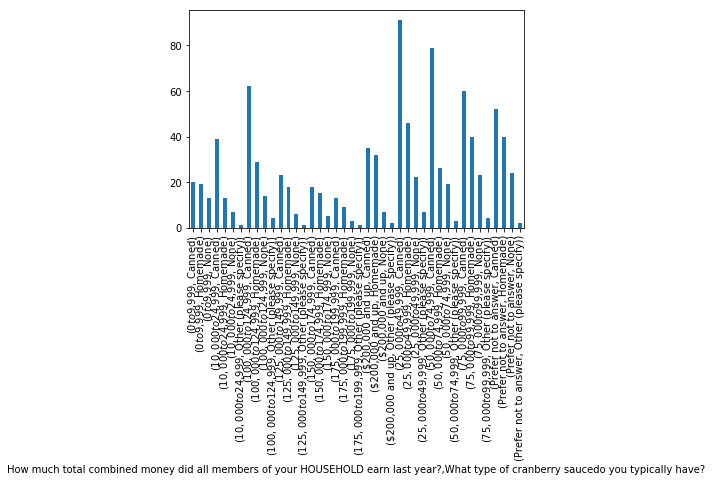

In [25]:
x.plot.bar(stacked = True)

In [166]:
income = pd.DataFrame({'a': celebrate['What is typically the main dish at your Thanksgiving dinner?'] == "Tofurkey", 'b': celebrate['What type of cranberry saucedo you typically have?'] == "Homemade", 'c': celebrate['How much total combined money did all members of your HOUSEHOLD earn last year?']})

In [172]:
bara = income.groupby('c')

In [174]:
bara.mean()

,a,b
c,,
"$0 to $9,999",0.019231,0.365385
"$10,000 to $24,999",0.033333,0.216667
"$100,000 to $124,999",0.027523,0.266055
"$125,000 to $149,999",0.041667,0.375000
"$150,000 to $174,999",0.000000,0.394737
"$175,000 to $199,999",0.038462,0.346154
"$200,000 and up",0.013158,0.421053
"$25,000 to $49,999",0.024096,0.277108
"$50,000 to $74,999",0.007874,0.204724


c
$0 to $9,999            Axes(0.125,0.125;0.775x0.755)
$10,000 to $24,999      Axes(0.125,0.125;0.775x0.755)
$100,000 to $124,999    Axes(0.125,0.125;0.775x0.755)
$125,000 to $149,999    Axes(0.125,0.125;0.775x0.755)
$150,000 to $174,999    Axes(0.125,0.125;0.775x0.755)
$175,000 to $199,999    Axes(0.125,0.125;0.775x0.755)
$200,000 and up         Axes(0.125,0.125;0.775x0.755)
$25,000 to $49,999      Axes(0.125,0.125;0.775x0.755)
$50,000 to $74,999      Axes(0.125,0.125;0.775x0.755)
$75,000 to $99,999      Axes(0.125,0.125;0.775x0.755)
Prefer not to answer    Axes(0.125,0.125;0.775x0.755)
dtype: object

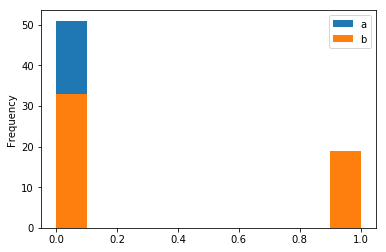

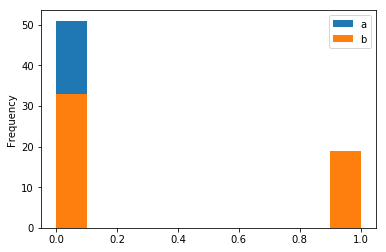

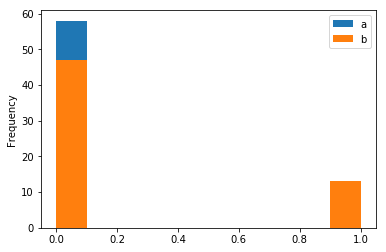

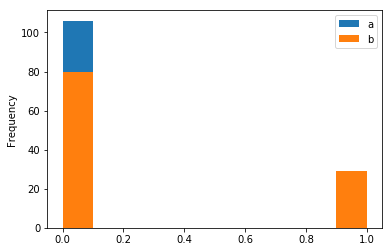

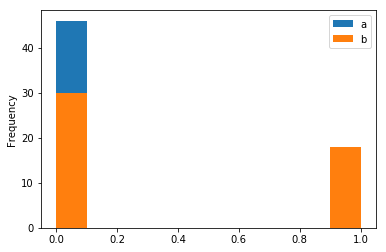

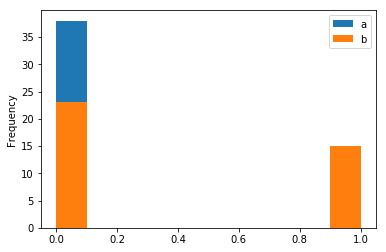

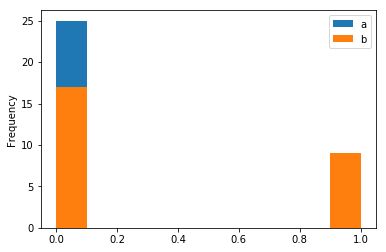

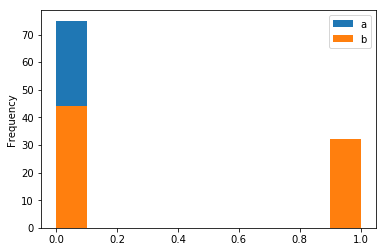

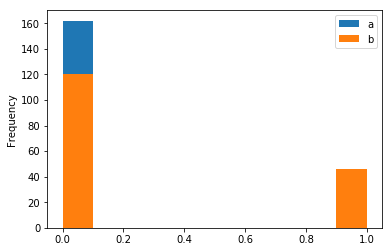

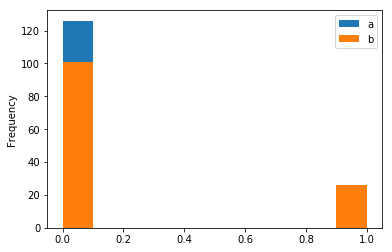

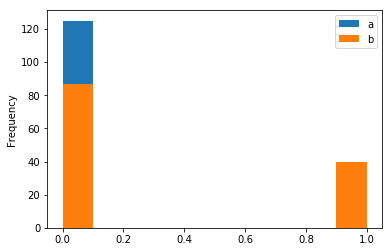

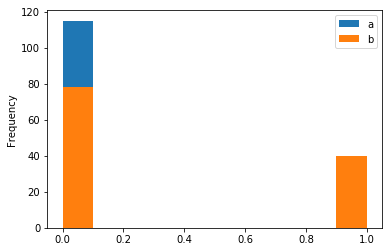

In [224]:
bara.plot.hist()